In [93]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# this allows plots to appear directly in the notebook
%matplotlib inline

In [94]:
# read data into a DataFrame
data = pd.read_csv('beijing_data.csv', index_col=0)
data.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [95]:
data = data[np.isfinite(data['pm2.5'])]

Attribute Information:

No: row number

year: year of data in this row

month: month of data in this row

day: day of data in this row

hour: hour of data in this row

pm2.5: PM2.5 concentration (ug/m^3)

DEWP: Dew Point (â„ƒ)

TEMP: Temperature (â„ƒ)

PRES: Pressure (hPa)

cbwd: Combined wind direction

Iws: Cumulated wind speed (m/s)

Is: Cumulated hours of snow

Ir: Cumulated hours of rain


In [96]:
data.rename(columns={'pm2.5':'pm25'}, inplace=True)

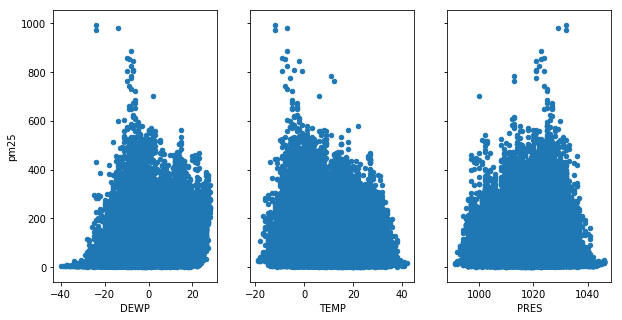

In [97]:
data.shape# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='DEWP', y='pm25', ax=axs[0], figsize=(10, 5))
data.plot(kind='scatter', x='TEMP', y='pm25', ax=axs[1])
data.plot(kind='scatter', x='PRES', y='pm25', ax=axs[2])


In [135]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='pm25 ~ Iws', data=data).fit()

# print the coefficients
lm.params

Intercept    109.584514
Iws           -0.459690
dtype: float64

In [136]:
# manually calculate the prediction
96.699839 + 1.093249*10

107.632329

In [137]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'Iws': [10]})
X_new.head()

,Iws
0,10


In [138]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    104.987616
dtype: float64

In [139]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'Iws': [data.Iws.min(), data.Iws.max()]})
X_new.head()

,Iws
0,0.45
1,565.49


In [140]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0    109.377654
1   -150.365449
dtype: float64

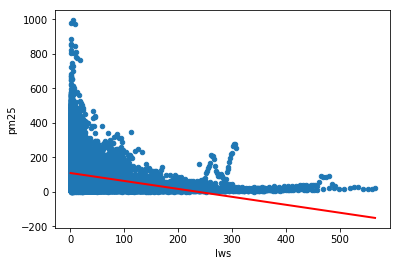

In [141]:
# first, plot the observed data
data.plot(kind='scatter', x='Iws', y='pm25')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [142]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,108.63530,110.533728
Iws,-0.47693,-0.442450


In [143]:
data.corr()

,year,month,day,hour,pm25,DEWP,TEMP,PRES,Iws,Is,Ir
year,1.000000,-0.002452,-0.000103,0.000200,-0.014690,0.007298,0.055656,-0.013466,-0.068278,-0.019549,-0.026298
month,-0.002452,1.000000,0.006901,-0.000543,-0.024069,0.234492,0.172135,-0.066317,0.014664,-0.062883,0.038874
day,-0.000103,0.006901,1.000000,0.000327,0.082788,0.033537,0.022871,-0.010497,-0.004944,-0.037449,-0.000102
hour,0.000200,-0.000543,0.000327,1.000000,-0.023116,-0.021784,0.149443,-0.041831,0.058865,-0.002455,-0.008741
pm25,-0.014690,-0.024069,0.082788,-0.023116,1.000000,0.171423,-0.090534,-0.047282,-0.247784,0.019266,-0.051369
DEWP,0.007298,0.234492,0.033537,-0.021784,0.171423,1.000000,0.823821,-0.777722,-0.293106,-0.034925,0.125341
TEMP,0.055656,0.172135,0.022871,0.149443,-0.090534,0.823821,1.000000,-0.826903,-0.149613,-0.094785,0.049544
PRES,-0.013466,-0.066317,-0.010497,-0.041831,-0.047282,-0.777722,-0.826903,1.000000,0.178871,0.070537,-0.080532
Iws,-0.068278,0.014664,-0.004944,0.058865,-0.247784,-0.293106,-0.149613,0.178871,1.000000,0.022630,-0.009157
Is,-0.019549,-0.062883,-0.037449,-0.002455,0.019266,-0.034925,-0.094785,0.070537,0.022630,1.000000,-0.009764


In [144]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    0.0
Iws          0.0
dtype: float64

In [145]:
# print the R-squared value for the model
lm.rsquared

0.061397133248041968

In [146]:

# create a fitted model with all three features
lm = smf.ols(formula='pm25 ~ PRES + Iws + TEMP', data=data).fit()

# print the coefficients
lm.params

Intercept    3263.730645
PRES           -3.065177
Iws            -0.460017
TEMP           -3.109338
dtype: float64

In [147]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pm25   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     1807.
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:42:24   Log-Likelihood:            -2.4554e+05
No. Observations:               41757   AIC:                         4.911e+05
Df Residuals:                   41753   BIC:                         4.911e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3263.7306     75.351     43.313      0.000    3116.040    3411.421
PRES          -3.0652      0.074    -41.687      0.000      -3.209      -2.921
Iws           -0.4600      0.009    -52.987      0.000      -0.477      -0.443
TEMP          -3.1093      0.062    -50.230      0.000      -3.231      -2.988
==============================================================================
Omnibus:                    14465.684   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57724.347
Skew:                           1.696   Prob(JB):                         0.00
Kurtosis:                       7.655   Cond. No.                     1.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
# only include TV and Radio in the model
lm = smf.ols(formula='pm25 ~  Iws', data=data).fit()
lm.rsquared

0.061397133248041968

In [149]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='pm25 ~ DEWP + TEMP + PRES', data=data).fit()
lm.rsquared

0.20465227855405632

In [150]:
# create X and y
feature_cols = ['TEMP', 'PRES', 'DEWP']
X = data[feature_cols]
y = data.pm25

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

1693.48495919
[-6.18920344 -1.5014108   4.56090675]


In [151]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm.coef_))

[('TEMP', -6.1892034378628775),
 ('PRES', -1.5014107955268412),
 ('DEWP', 4.5609067497759677)]

In [152]:
# predict for a new observation


In [153]:
# calculate the R-squared
lm.score(X, y)

0.20465227855405618